In [15]:
import cv2
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
import skimage
def displayImage(image,title):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

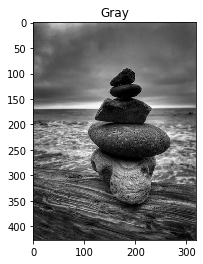

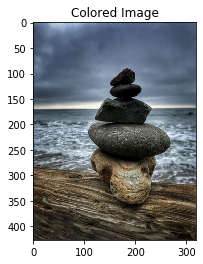

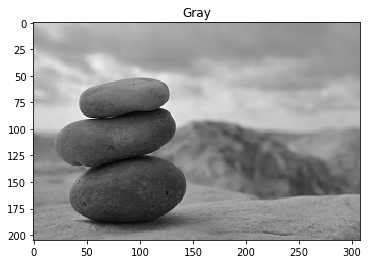

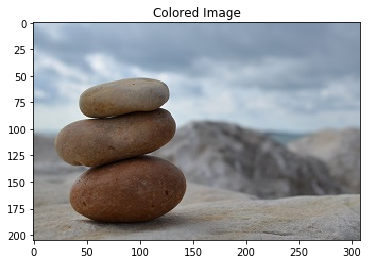

In [16]:
def displayImage(image,title):
    plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()
    
img_gray = cv2.imread("Images/01.jpg",0) 
displayImage(img_gray,"Gray")
img_color = cv2.imread("Images/01.jpg",1) 
displayImage(img_color,"Colored Image")

img_gray1 = cv2.imread("Images/02.jpg",0) 
displayImage(img_gray1,"Gray")
img_color1 = cv2.imread("Images/02.jpg",1) 
displayImage(img_color1,"Colored Image")



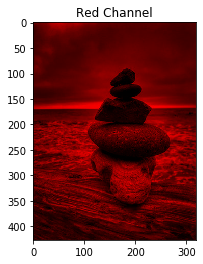

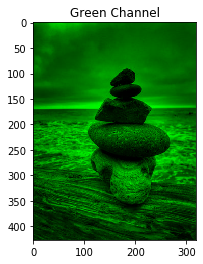

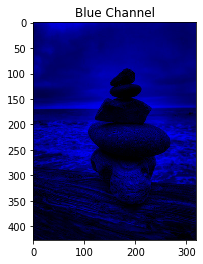

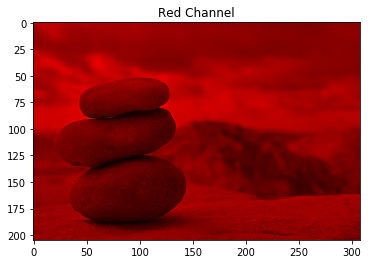

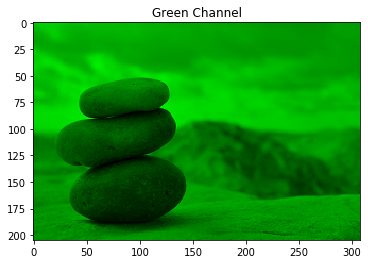

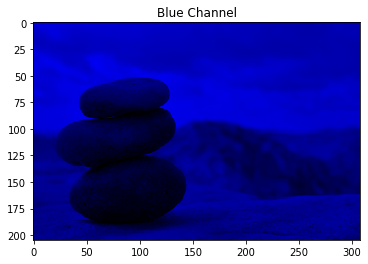

In [9]:
RED = img_color.copy()
RED[:,:,0] = 0 
RED[:,:,1] = 0 
displayImage(RED,"Red Channel")
GREEN = img_color.copy()
GREEN[:,:,0] = 0 
GREEN[:,:,2] = 0 
displayImage(GREEN,"Green Channel")
BLUE = img_color.copy()
BLUE[:,:,1] = 0 
BLUE[:,:,2] = 0 
displayImage(BLUE,"Blue Channel")

RED = img_color1.copy()
RED[:,:,0] = 0 
RED[:,:,1] = 0 
displayImage(RED,"Red Channel")
GREEN = img_color1.copy()
GREEN[:,:,0] = 0 
GREEN[:,:,2] = 0 
displayImage(GREEN,"Green Channel")
BLUE = img_color1.copy()
BLUE[:,:,1] = 0 
BLUE[:,:,2] = 0 
displayImage(BLUE,"Blue Channel")

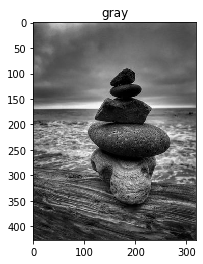

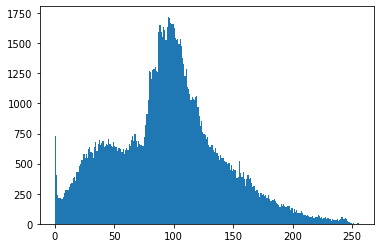

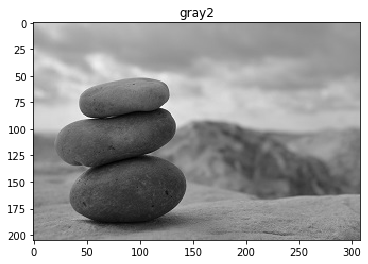

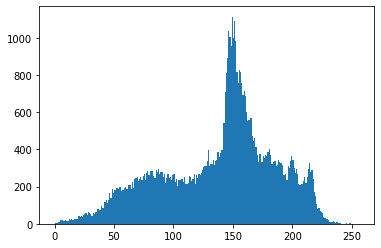

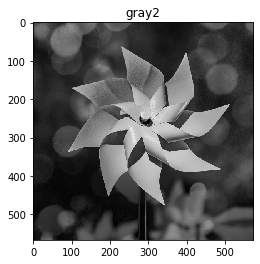

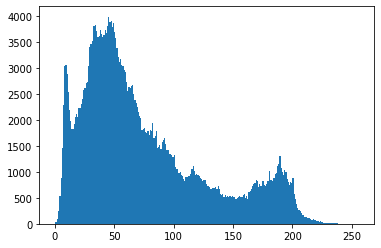

In [10]:
#Histogram

img = cv2.imread('images/01.jpg',0)
displayImage(img,"gray")
plt.hist(img.ravel(),256,[0,256]) 
plt.show()
img1 = cv2.imread('images/02.jpg',0)
displayImage(img1,"gray2")
eeq = plt.hist(img1.ravel(),256,[0,256]) 
plt.show()
img2 = cv2.imread('images/07.jpg',0)
displayImage(img2,"gray2")
eeq = plt.hist(img2.ravel(),256,[0,256]) 
plt.show()

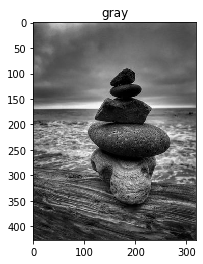

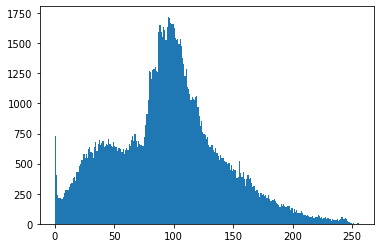

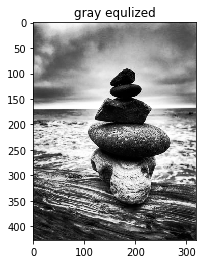

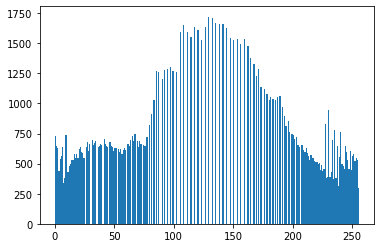

In [11]:
#histogram equalization

equ = cv2.equalizeHist(img) 
displayImage(img,"gray")
plt.hist(img.ravel(),256,[0,256])
plt.show()
displayImage(equ,"gray equlized")
plt.hist(equ.ravel(),256,[0,256])
plt.show()



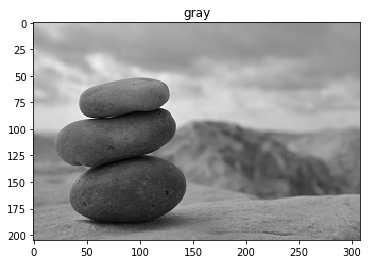

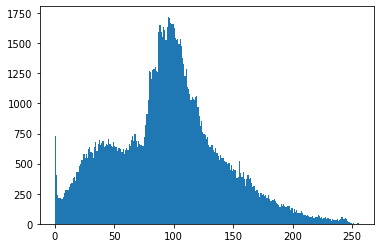

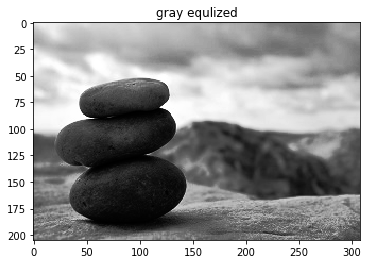

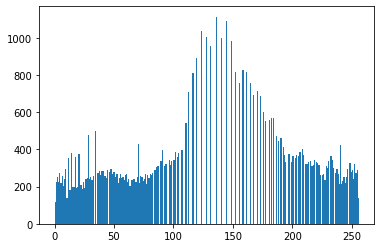

In [12]:
equ = cv2.equalizeHist(img1) 
displayImage(img1,"gray")
plt.hist(img.ravel(),256,[0,256])
plt.show()
displayImage(equ,"gray equlized")
plt.hist(equ.ravel(),256,[0,256])
plt.show()

In [61]:
# image convolution

def myConvolve2d(image, kernel):
   
    kernel = np.flipud(np.fliplr(kernel))    
    output = np.zeros_like(image)            
    image_padded = np.zeros((image.shape[0] + 2, image.shape[1] + 2))   
    image_padded[1:-1, 1:-1] = image

    for x in range(image.shape[0]):     
        for y in range(image.shape[1]):
            
            output[x,y]=(kernel*image_padded[x:x+3,y:y+3]).sum()    
    return output

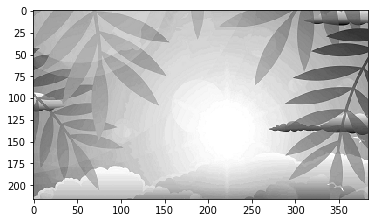

In [62]:
img = io.imread("./Images/03.png",1) 
plt.imshow(img,cmap=plt.cm.gray)

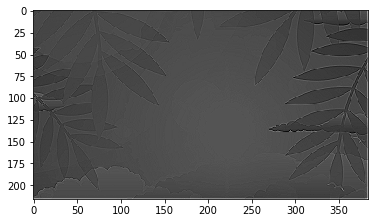

In [21]:
# Convolve the sharpen kernel (laplacian) and the image

kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

image_sharpen = myConvolve2d(img,kernel)
plt.imshow(image_sharpen,cmap=plt.cm.gray)

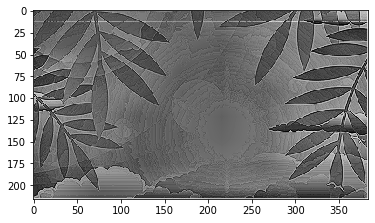

In [22]:
from skimage import exposure
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(image_sharpen)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized,cmap=plt.cm.gray)

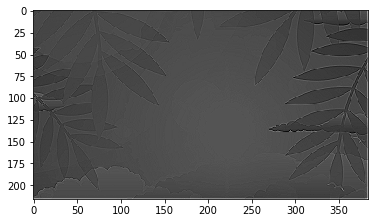

In [23]:
from scipy import signal
f = signal.convolve2d(img,kernel, 'same')
plt.imshow(f,cmap=plt.cm.gray)

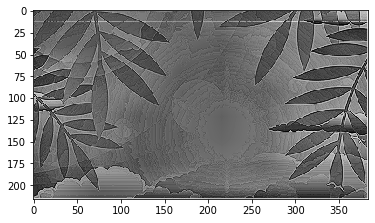

In [24]:
#sharpning image
image_sharpen_equalized = exposure.equalize_adapthist(image_sharpen/np.max(np.abs(f)), clip_limit=0.03)
plt.imshow(image_sharpen_equalized,cmap=plt.cm.gray)

Text(0.5, 1.0, 'Blurred')

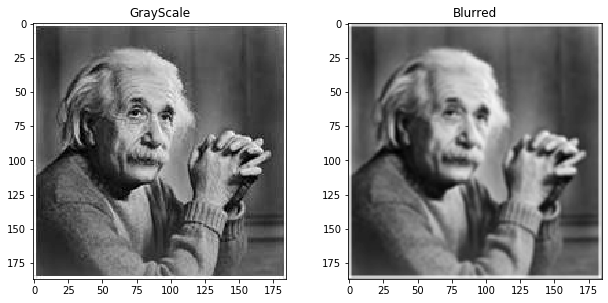

In [25]:
#box filter using convolution 3x3

img = cv2.imread("./Images/04.jpg",0)

kernel = np.ones((3,3),np.float32)/9 
f = signal.convolve2d(img,kernel, 'same')

plt.rcParams['figure.figsize'] = (16.0, 16.0) 
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(3, 3, 2)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("Blurred")

Text(0.5, 1.0, 'Blurred')

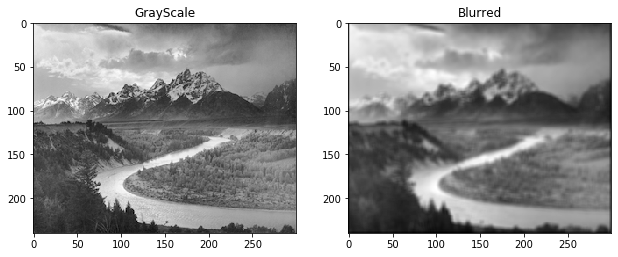

In [26]:
#box filter using convolution 5x5
img = cv2.imread("./Images/05.jpg",0)
kernel = np.ones((5,5),np.float32)/25 
f = signal.convolve2d(img,kernel, 'same')

plt.rcParams['figure.figsize'] = (16.0, 16.0) 
fig = plt.figure()
fig.add_subplot(3, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(3, 3, 2)
plt.imshow(f,cmap=plt.cm.gray)
plt.title("Blurred")

Text(0.5, 1.0, 'Gaussian Filter, sigma=4')

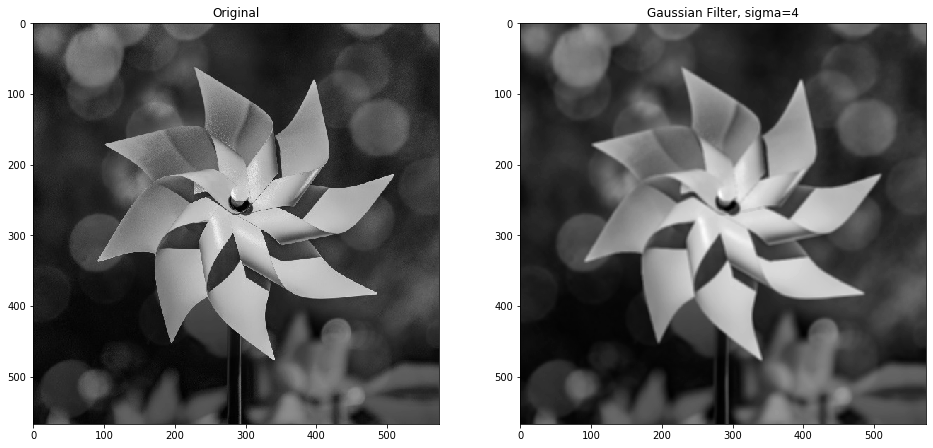

In [27]:
#Gaussian filter with varying sigma values
img11 = cv2.imread("./Images/07.jpg",0)
img_gaussianFilter1 = cv2.GaussianBlur(img11, (5,5),sigmaX=4)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img11,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter1,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=4")

Text(0.5, 1.0, 'Gaussian Filter, sigma=5')

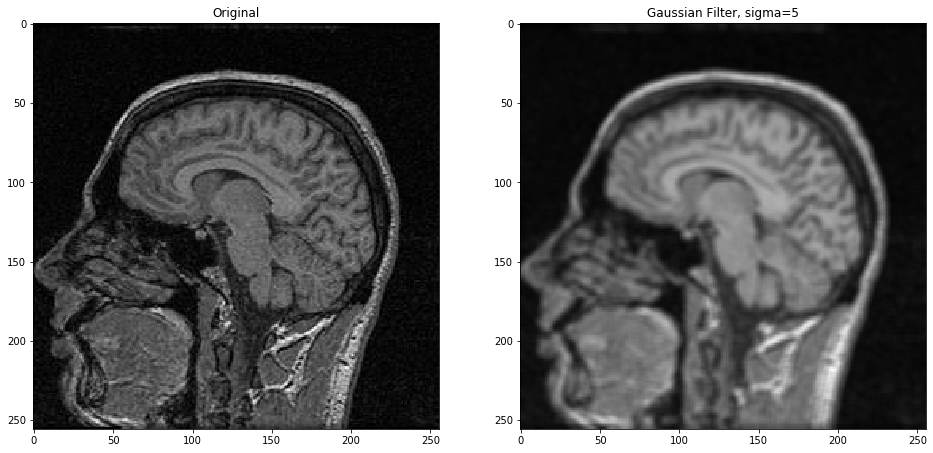

In [28]:
#Gaussian filter with varying sigma values
img12 = cv2.imread("./Images/08.jpg",0)
img_gaussianFilter2 = cv2.GaussianBlur(img12, (5,5),sigmaX=5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img12,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter2,cmap=plt.cm.gray)
plt.title("Gaussian Filter, sigma=5")


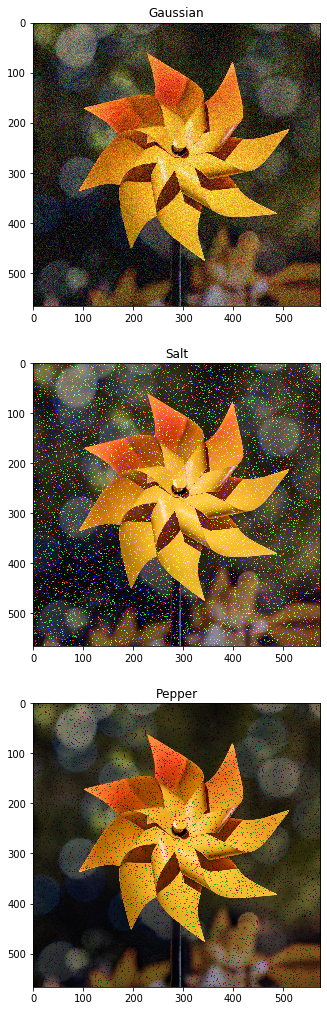

In [13]:
#Gausian Noise and Salt and Pepper Noise 
img_path="images/07.jpg"
img = skimage.io.imread(img_path)/255.0
def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    
plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "Gaussian", r,c,1)
plotnoise(img, "Salt", r,c,3)
plotnoise(img, "Pepper", r,c,5)
plt.show()



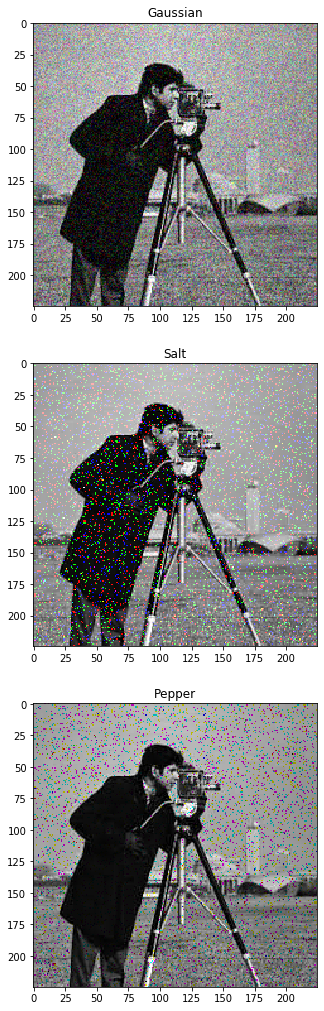

In [14]:
#Gausian Noise and Salt and Pepper Noise 
img_path="images/06.jpeg"
img = skimage.io.imread(img_path)/255.0
def plotnoise(img, mode, r, c, i):
    plt.subplot(r,c,i)
    if mode is not None:
        gimg = skimage.util.random_noise(img, mode=mode)
        plt.imshow(gimg)
    else:
        plt.imshow(img)
    plt.title(mode)
    
plt.figure(figsize=(18,24))
r=4
c=2
plotnoise(img, "Gaussian", r,c,1)
plotnoise(img, "Salt", r,c,3)
plotnoise(img, "Pepper", r,c,5)
plt.show()

Text(0.5, 1.0, 'Gaussian Filter')

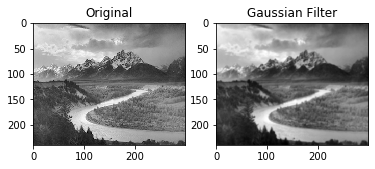

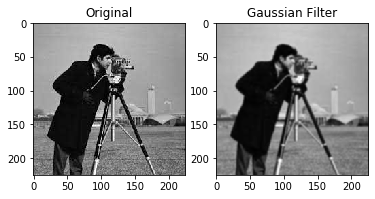

In [68]:
#Gaussain filter
img13=cv2.imread("Images/05.jpg",0) 
img_gaussianFilter3 = cv2.GaussianBlur(img13, (5,5),0)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img13,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter3,cmap=plt.cm.gray)
plt.title("Gaussian Filter")
img13=cv2.imread("Images/06.jpeg",0) 
img_gaussianFilter3 = cv2.GaussianBlur(img13, (5,5),0)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img13,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_gaussianFilter3,cmap=plt.cm.gray)
plt.title("Gaussian Filter")

Text(0.5, 1.0, 'Median Filter')

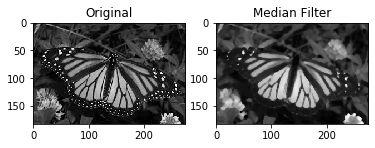

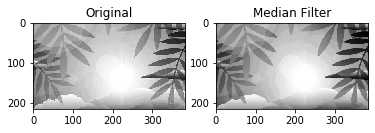

In [69]:
#Median filter
img13=cv2.imread("Images/055.jpeg",0) 
img_med = cv2.medianBlur(img13,5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img13,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("Median Filter")
img13=cv2.imread("Images/03.png",0) 
img_med = cv2.medianBlur(img13,5)
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.imshow(img13,cmap=plt.cm.gray)
plt.title("Original")
fig.add_subplot(1, 2, 2)
plt.imshow(img_med,cmap=plt.cm.gray)
plt.title("Median Filter")

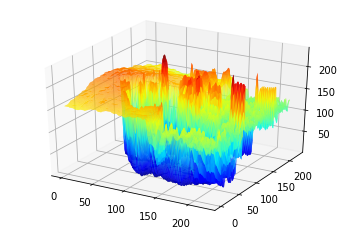

In [70]:
## mesh plot of gaussainfilter

from mpl_toolkits.mplot3d import Axes3D
import scipy.misc


#img_gaussianFilter = cv2.resize(img_gaussianFilter, (100,100))

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img_gaussianFilter3.shape[0], 0:img_gaussianFilter3.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img_gaussianFilter3 ,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)

# show it
plt.show()

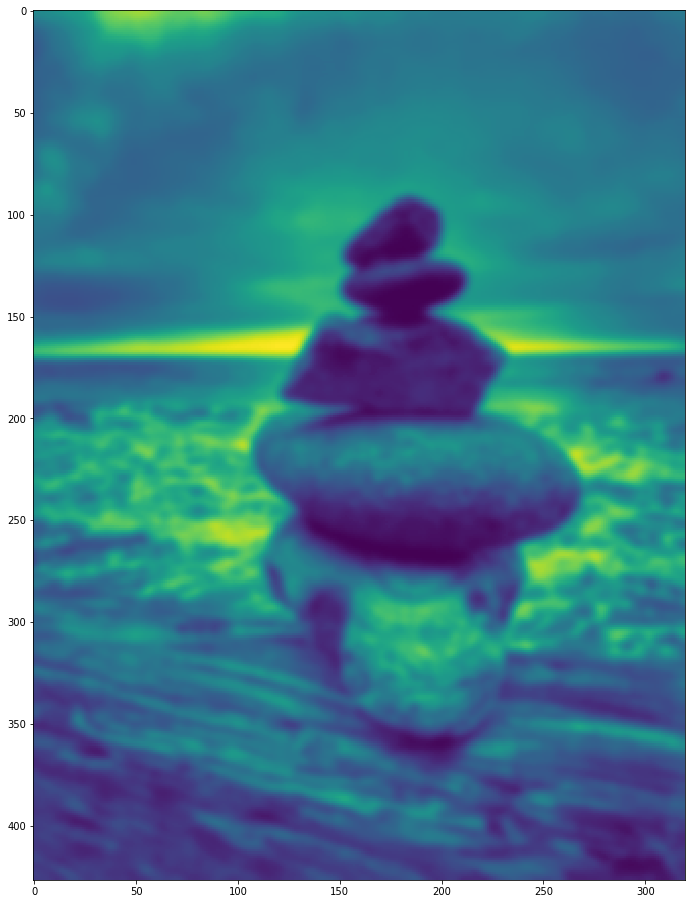

In [44]:
#first order derivative
from scipy.ndimage import gaussian_filter
img = cv2.imread("Images/01.jpg",0)

image_first_derivative = gaussian_filter(img, sigma=2)
plt.imshow(image_first_derivative)
plt.show()


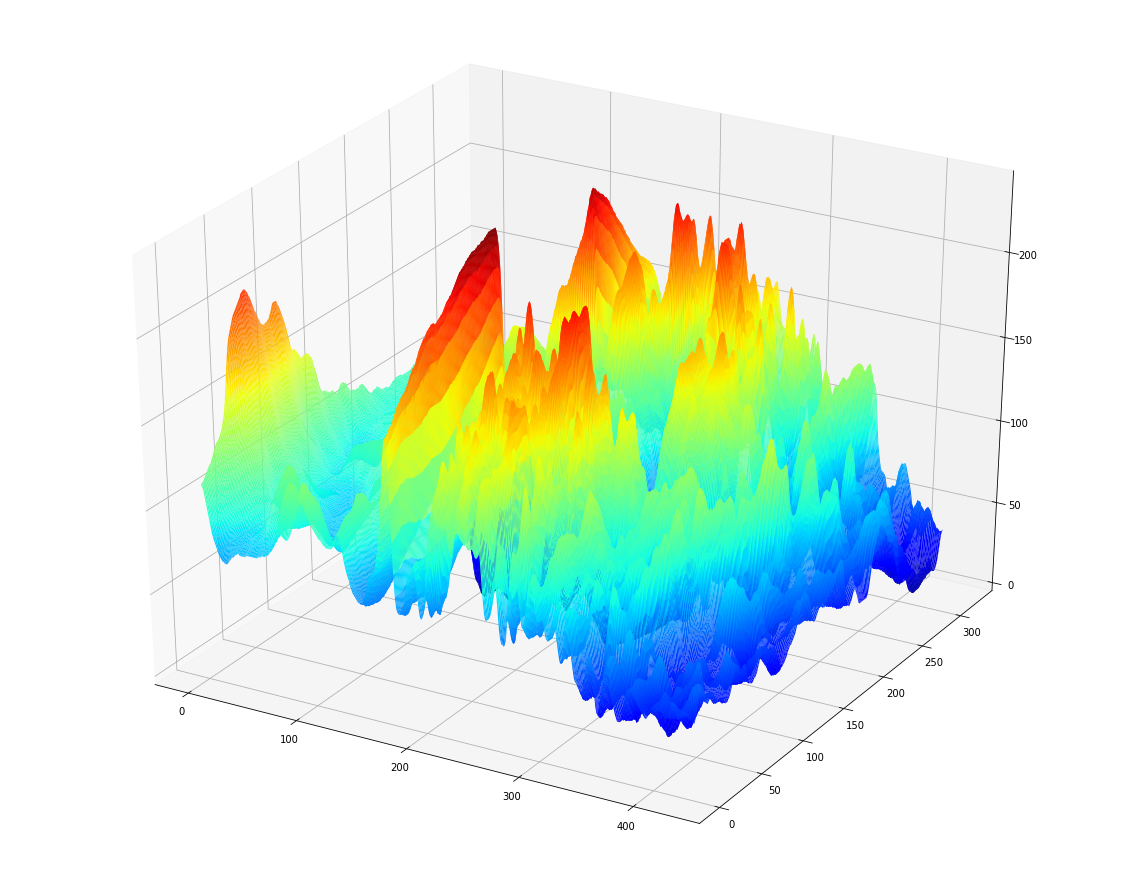

In [45]:
#mesh plot of first order deriavtive

from mpl_toolkits.mplot3d import Axes3D
# generate some sample data
import scipy.misc

# downscaling has a "smoothing" effect
#image_first_derivative = cv2.resize(image_first_derivative, (100,100))

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:image_first_derivative.shape[0], 0:image_first_derivative.shape[1]]

# create the figure
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, image_first_derivative ,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)
plt.show()

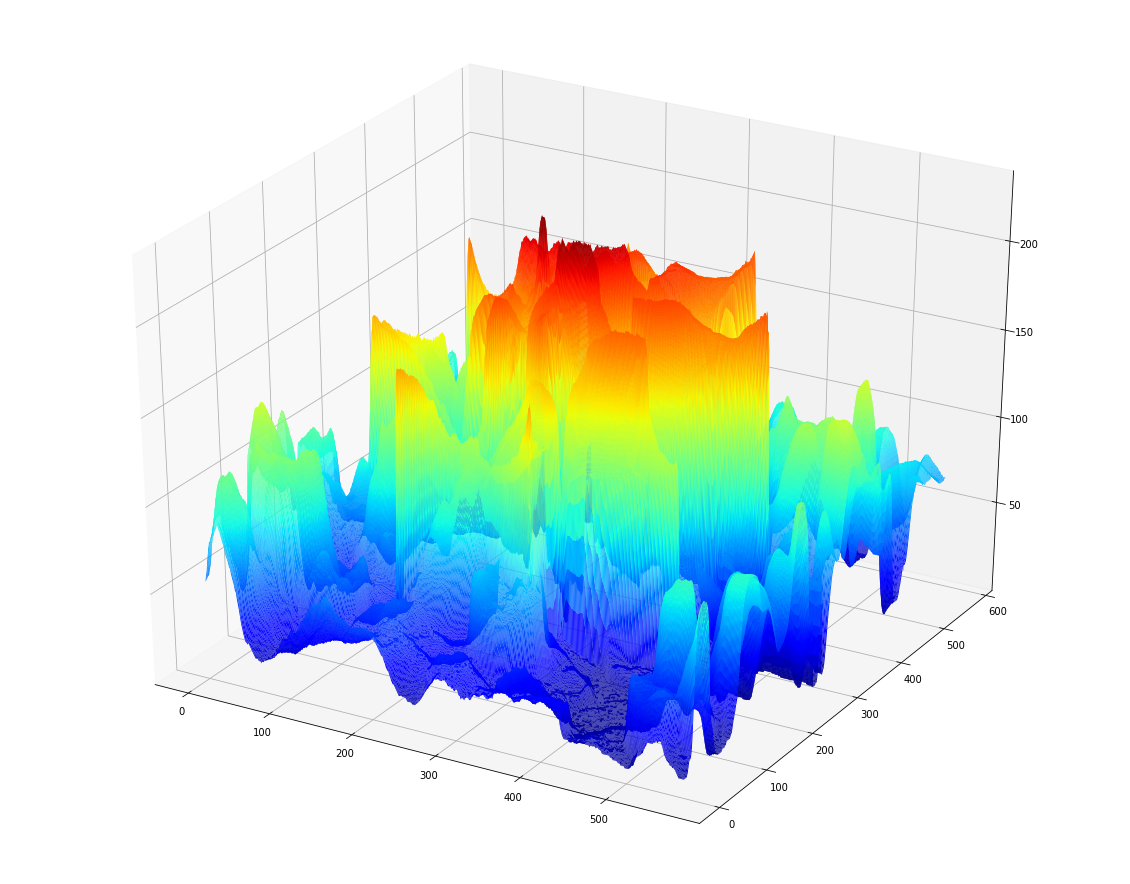

In [41]:
# mesh plot of lapacian with sigma4

from mpl_toolkits.mplot3d import Axes3D

import scipy.misc

#img_gaussianFilter = cv2.resize(img_gaussianFilter, (100,100))

# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img_gaussianFilter1.shape[0], 0:img_gaussianFilter1.shape[1]]


fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img_gaussianFilter1 ,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)
plt.show()

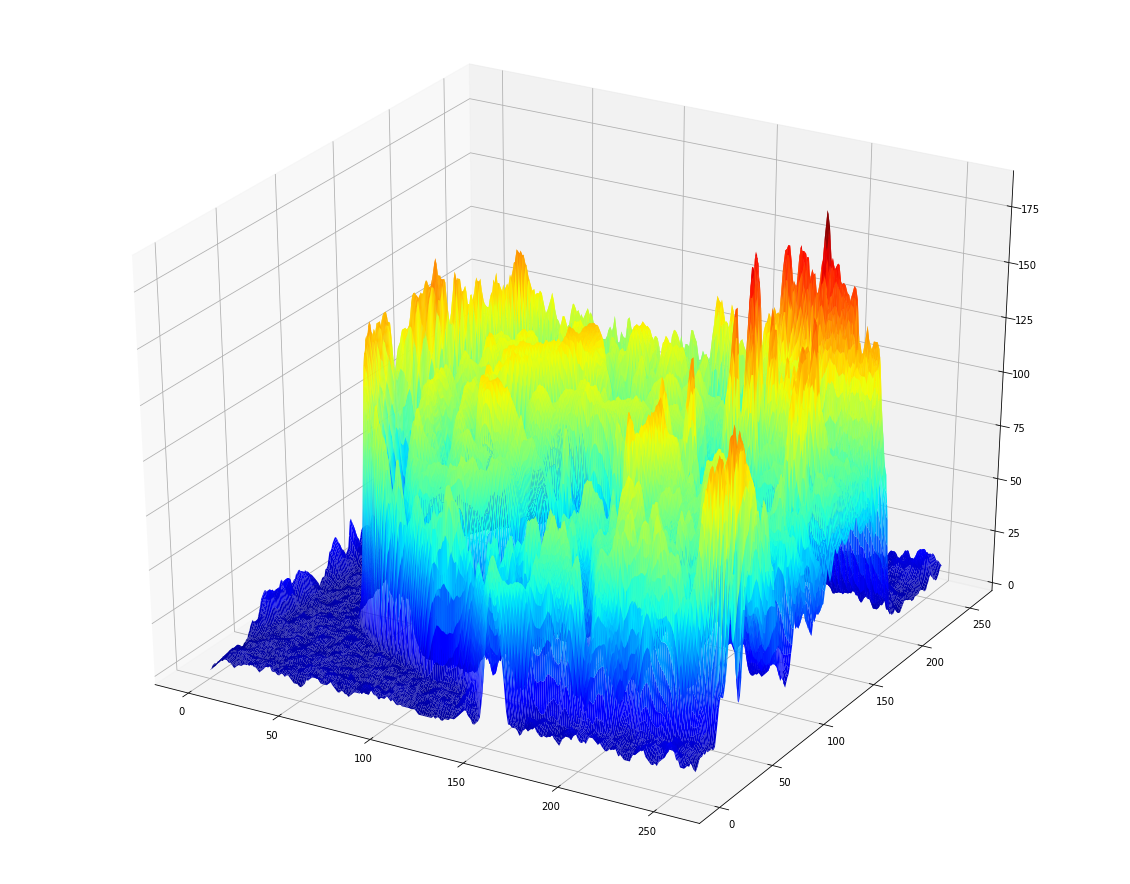

In [42]:
#mesh plot of lapacian with sigma5

from mpl_toolkits.mplot3d import Axes3D
import scipy.misc

#img_gaussianFilter = cv2.resize(img_gaussianFilter, (100,100))
# create the x and y coordinate arrays (here we just use pixel indices)
xx, yy = np.mgrid[0:img_gaussianFilter2.shape[0], 0:img_gaussianFilter2.shape[1]]

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(xx, yy, img_gaussianFilter2 ,rstride=1, cstride=1, cmap=plt.cm.jet,
                linewidth=0)

plt.show()

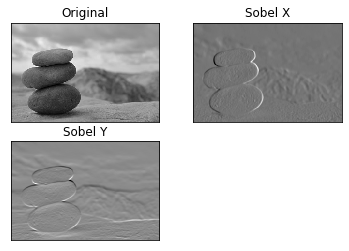

In [72]:
#soble operator
img = cv2.imread('images/02.jpg',0)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)


plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

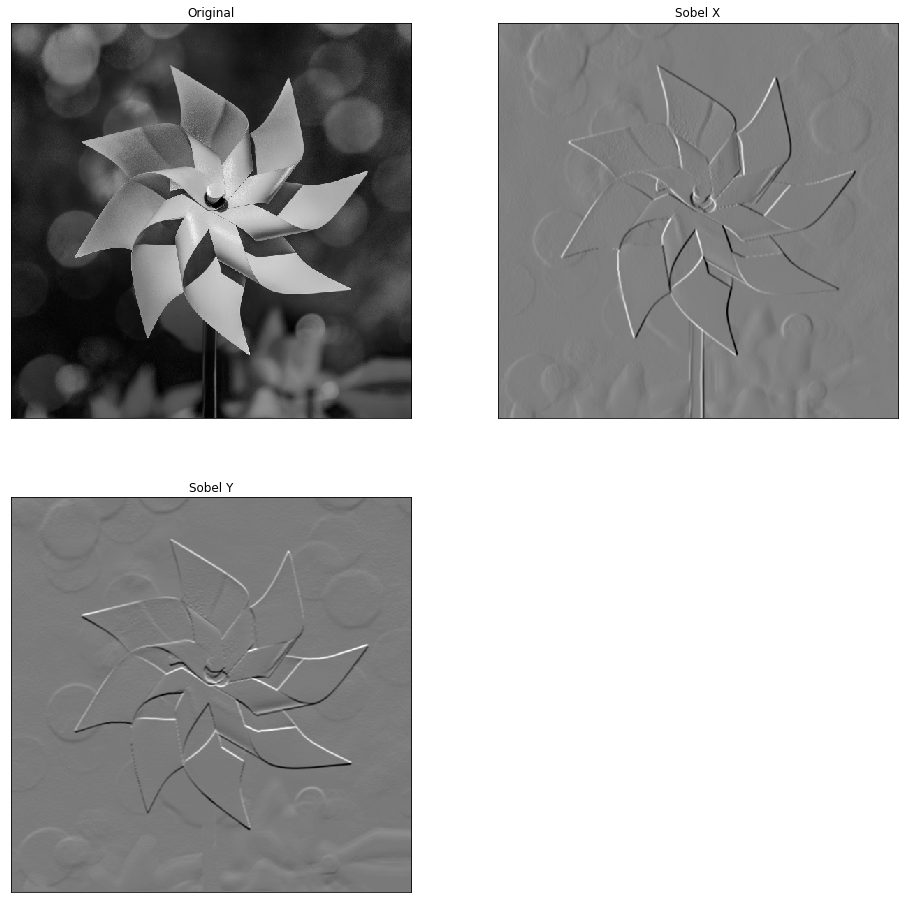

In [36]:
#soble operator
img = cv2.imread('images/07.jpg',0)

sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

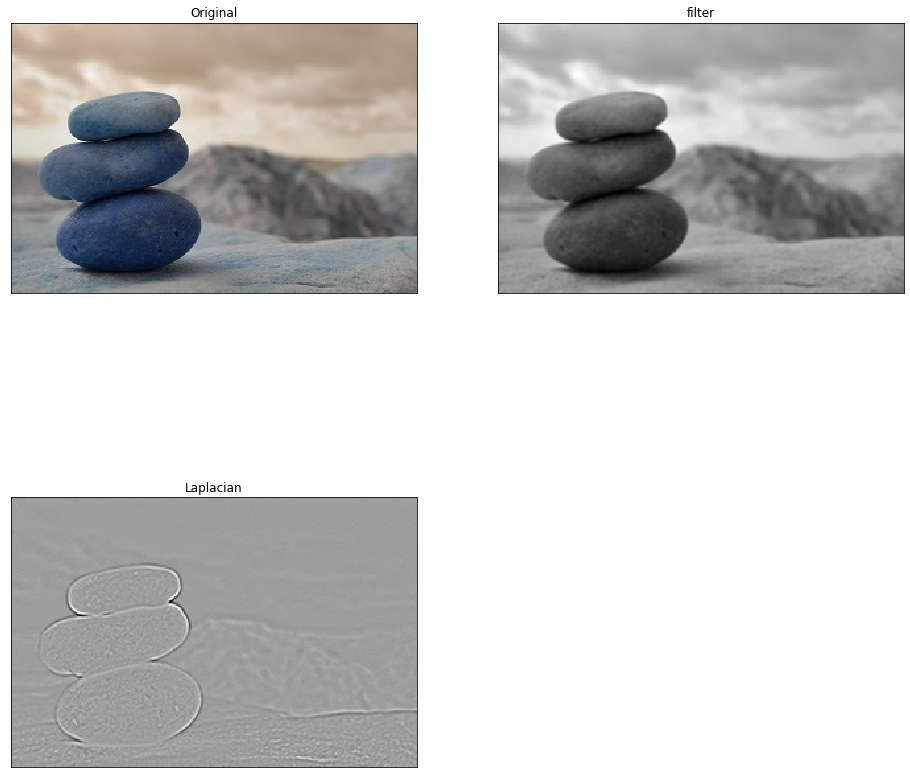

In [37]:
#Laplacian of gaussian
img0 = cv2.imread('images/02.jpg',)

gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(2,2,1),plt.imshow(img0)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img,cmap = 'gray')
plt.title('filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

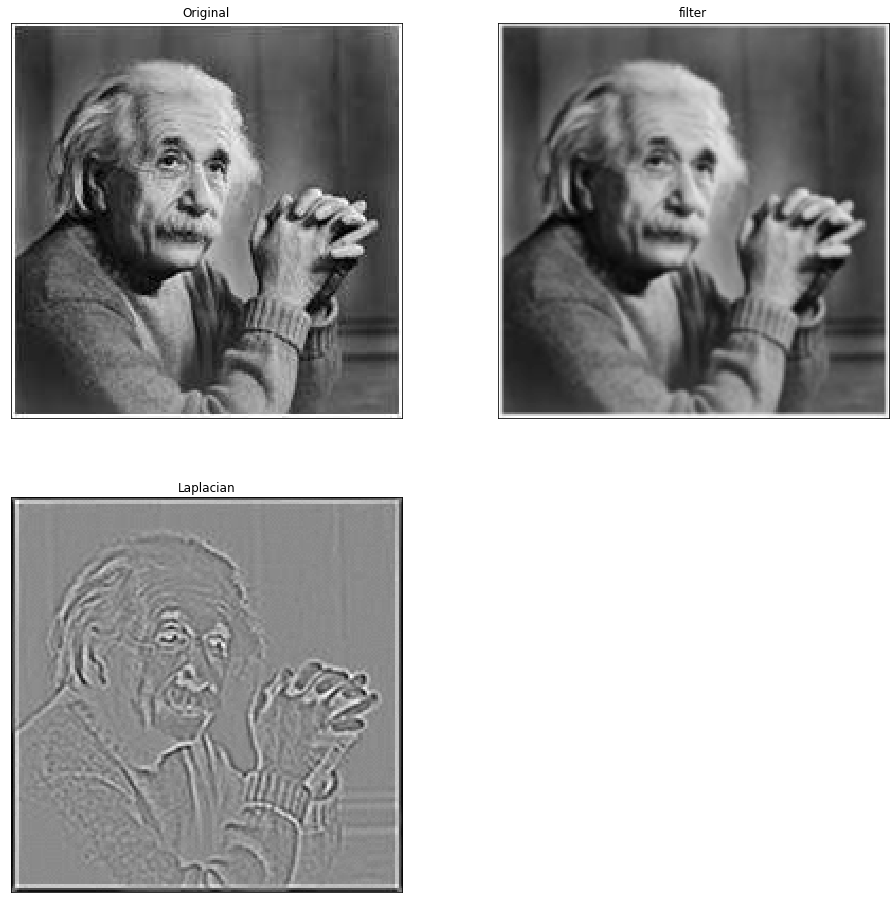

In [38]:
#Laplacian of gaussian
img0 = cv2.imread('images/04.jpg',)
gray = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
img = cv2.GaussianBlur(gray,(3,3),0)
laplacian = cv2.Laplacian(img,cv2.CV_64F)

plt.subplot(2,2,1),plt.imshow(img0)
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(img,cmap = 'gray')
plt.title('filter'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])

plt.show()

Text(0.5, 1.0, 'Canny edge detector')

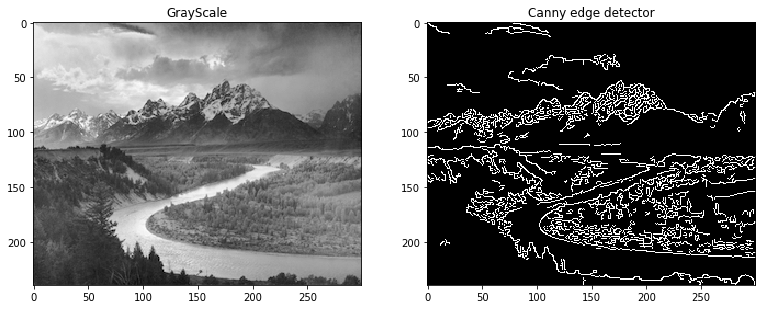

In [39]:
#canny edge 
img = cv2.imread("Images/05.jpg",0)
edges = cv2.Canny(img, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")

Text(0.5, 1.0, 'Canny edge detector')

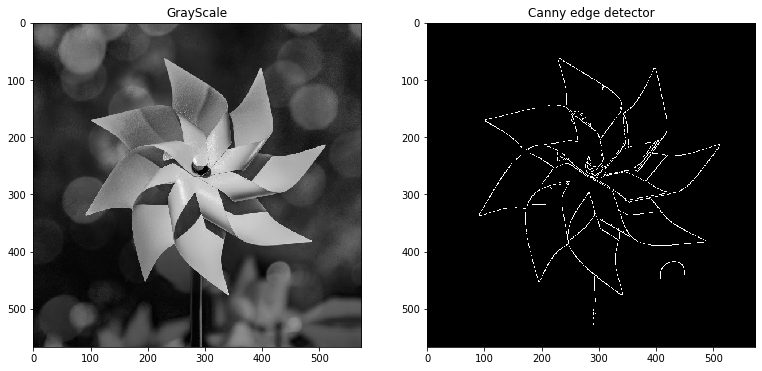

In [40]:
#canny edge 
img = cv2.imread("Images/07.jpg",0)
edges = cv2.Canny(img, 100, 200)
plt.rcParams['figure.figsize'] = (20.0, 16.0) # set default size of plots
fig = plt.figure()
fig.add_subplot(1, 3, 1)
plt.imshow(img,cmap=plt.cm.gray)
plt.title("GrayScale")
fig.add_subplot(1, 3, 2).imshow(edges,cmap=plt.cm.gray)
plt.title("Canny edge detector")